In [15]:
#!/usr/bin/python3
import time 
import pyautogui
import numpy as np
import pytesseract as tes
def get_image(im):
    return im.crop((880, 385, 1110,550))

def action(key):
    pyautogui.press(key)

#n=int(input("Enter the score:\n"))/2
#n=int(n/2)
time.sleep(5)
flag=0
for i in range(1):
    im = pyautogui.screenshot(str(i)+".jpg")
    c=get_image(im)
    c.save("55"+str(i)+".jpg")
    top=c.crop((0,0,c.width,c.height/2))
    bottom=c.crop((0,c.height/2,c.width,c.height/2))

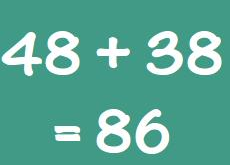

In [17]:
c


In [19]:
results = tes.image_to_string(top)





OSError: [Errno 2] No such file or directory

In [23]:
from sklearn.externals import joblib
from sklearn import datasets
from skimage.feature import hog
from sklearn.svm import LinearSVC
import numpy as np

dataset = datasets.fetch_mldata("MNIST Original")
features = np.array(dataset.data, 'int16') 
labels = np.array(dataset.target, 'int')

list_hog_fd = []
for feature in features:
    fd = hog(feature.reshape((28, 28)), orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), visualise=False)
    list_hog_fd.append(fd)
hog_features = np.array(list_hog_fd, 'float64')

clf = LinearSVC()
clf.fit(hog_features, labels)
joblib.dump(clf, "digits_cls.pkl", compress=3)


['digits_cls.pkl']

In [28]:
import cv2
from sklearn.externals import joblib
from skimage.feature import hog
import numpy as np

# Load the classifier
clf = joblib.load("digits_cls.pkl")

# Read the input image 
top.save('topsave.jpg')
im = cv2.imread('topsave.jpg')

# Convert to grayscale and apply Gaussian filtering
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im_gray = cv2.GaussianBlur(im_gray, (5, 5), 0)

# Threshold the image
ret, im_th = cv2.threshold(im_gray, 90, 255, cv2.THRESH_BINARY_INV)

# Find contours in the image
ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get rectangles contains each contour
rects = [cv2.boundingRect(ctr) for ctr in ctrs]

# For each rectangular region, calculate HOG features and predict
# the digit using Linear SVM.
for rect in rects:
    # Draw the rectangles
    cv2.rectangle(im, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
    # Make the rectangular region around the digit
    leng = int(rect[3] * 1.6)
    pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
    pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
    roi = im_th[pt1:pt1+leng, pt2:pt2+leng]
    # Resize the image
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    roi = cv2.dilate(roi, (3, 3))
    # Calculate the HOG features
    roi_hog_fd = hog(roi, orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), visualise=False)
    nbr = clf.predict(np.array([roi_hog_fd], 'float64'))
    cv2.putText(im, str(int(nbr[0])), (rect[0], rect[1]),cv2.FONT_HERSHEY_DUPLEX, 2, (0, 255, 255), 3)

cv2.imshow("Resulting Image with Rectangular ROIs", im)
cv2.waitKey()


ValueError: too many values to unpack